# Sales Forecasting of  Retail Clothing Product Categories 

**Problem Description:** Building a framework that provides monthly forecasts of the 12 months (ie., from Jan 2016 to Dec 2106) for "Womenclothing" product category with influencing factors of the sales such as holiday events, weather changes, Macroeconomic factors etc using the Regression model.

**How this Business problem is converted into a Machine Learning problem and how it will help the business?**

A leading retailer in USA, wants to forecast sales for their product categories in their store based on the sales history of each category. Sales forecast has very high influence on the performance of the company’s business and hence these sales forecasts can be used to estimate company’s success or performance in the coming year. Accurate forecasts may lead to better decisions in business. Sales or revenues forecasting is very important for retail operations. Forecasting of retail sales helps retailer to take necessary measures to plan their budgets or investments in a period (monthly, yearly) among different product categories like women clothing, men clothing and other clothing and at the same time they can plan to minimize revenue loss from unavailability of products by investing accordingly.The good news is that powerful Machine Learning (ML) algorithm can help to forecast sales of different category clothng product for next few years.

**Data**: There are 4 datasets 
1. Macro Economic Dataset 
2. Events and Holidays Dataset 
3. Weather Data Set 
4. Train Data (Sales and the Year/Month)


#####                                                                                 Sales Data Description
    AttributeName                  Type               Description
    Year                           temporal            Year
    Month                          temporal            Month
    ProductCategory                categorical         Clothing Products category - WomenClothing, MenClothing,OtherClothing
    Sales(In ThousandDollars)      numeric             Value of the sales or revenue in thousand dollars


#### Weather Data Description
    
    AttributeName                             Description                                                 ActualType
    Year                                       Year                                                        Temporal
    Month                                      Month                                                       Temporal
    Day                                        Day                                                         Temporal
    Temp high (°C)                             Temperature HighInF                                         numeric
    Temp avg (°C)                              Temperature AvgInF                                          numeric
    Temp low (°C)                              Temperature LowinF                                          numeric
    Dew Point high (°C)	                       DewPointHighInF	                                           numeric
    Dew Point avg (°C)	                       DewPointAvginF	                                           numeric
    Dew Point low (°C)	                       DewPointLowinF	                                           numeric
    Humidity (%) high	                       Humidity HighPercent	                                       numeric
    Humidity (%) avg	                       Humidity AvgPercent	                                       numeric
    Humidity (%) low	                       Humidity LowPercent	                                       numeric
    Sea Level Press.(hPa) high	               Sea Level Pressure High_hPa	                               numeric
    Sea Level Press.(hPa) avg	               Sea Level Pressure Avg_hPa	                               numeric
    Sea Level Press.(hPa) low	               Sea Level Pressure Low_hPa	                               numeric
    Visibility (km) high	                   Visibility HighInKM	                                       numeric
    Visibility (km) avg	                       Visibility AvgInKM	                                       numeric
    Visibility (km) low	                       Visibility LowInKM	                                       numeric
    Wind (km/h) low	Wind                       LowInKmperhour	                                           numeric
    Wind (km/h) avg	Wind                       AvgInKmperhour	                                           numeric
    Wind (km/h) high Wind                      HighInKmperhour	                                           numeric
    Precip. (mm) sum	                       Precipitation sum in mm	                           numeric values and character
    WeatherEvent	                           Details of weather like snow, rain, fog etc	               categorical


##### Events Holiday Data Description

     AttributeName                    Description	                                   ActualType
           Year	                        Year	                                        Temporal
           MonthDate	                Month and date combination	                    Temporal
           Event	                    Details of special event or holiday	            categorical
           DayCategory	                Whether federal holiday or event	            categorical


##### MacroEconomic Data Description

    AttributeName	                                 Description	                                         ActualType
    1.Year-Month	                            Combination of Year and month	                               Temporal
    2.MonthlyNominal GDP Index 	                Monthly NominalGDPIndex In Million Dollars	                   numeric
    3.Monthly Real GDP Index 	                Monthly RealGDPIndex In Million Dollars	                       numeric
    4.CPI	                                    CPI	                                                           numeric
    5.PartyInPower	                            Political party which is in power	                           categorical
    6.unemployment rate	                        unemployment rate	                                           numeric
    7.CommercialBankInterestRateon
    8.CreditCardPlans Commercial Bank           Interest Rate on Credit Card Plans	                           numeric
    9.Finance Rate on Personal Loans  
    at Commercial Banks, 24 Month Loan	        Finance Rate on Personal Loans 
                                                at CommercialBanks_24MonthLoan	                               numeric                                                                                
    10.Earnings or wages in dollars per hour	Earnings or wages in dollars per hour	                       numeric
    11.AdvertisingExpenses                      Expenses for ads in thousand dollars	                       numeric
    12.Cotton Monthly Price                     Cotton Monthly Price_US cents per Pound_lbs	                   numeric
    13.Change Percentage                        Change In Mly Cotton Price	                                   numeric
    14.Average upland planted	                Average upland Cotton planted In Million Acres	               numeric
    15.Average upland harvested             	Average upland Cotton harvested In Million Acres	           numeric
    yieldperharvested acre	                    Cotton yield per harvested acre( in pounds ie lbs)	           numeric        
    16.Production	                            Cotton Production In480_l bnetweight in Million Bales          numeric
    17.Mill use	                                Cotton Mill Use In480_lb netweight in Million Bales	           numeric
    18.Exports Cotton                           Explorts In480_lb netweight in Million Bales	               numeric


## Make Dataset

Following section process the raw data set and creats balance processed dataset.
It saves it to processed data

### Importing Dependecies & Config

Import Libraries

In [244]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
import re

Load Config

In [245]:
import yaml

#read yaml file
with open('../config/config.yaml') as file:
  config= yaml.safe_load(file)
  #print(config)

### Loading the Files and Reading the Data

Reading all the given files Train.csv, Events_HolidaysData.xlsx, MacroEconomicData.xlsx & WeatherDataNew.xlsx into pandas using pd.read() function.

Get the Root Dir path

In [246]:
#Get current working dir
cwd_path=os.getcwd()
#print(cwd_path)

#  Get the path of ROOT DIR
path_list = cwd_path.split(os.sep) #split path
ROOT_PATH=os.path.join(path_list[0],os.sep,*path_list[1:-2]) # To move two level up, remove last two str and join to create root path
#print(ROOT_PATH)

Get input file paths

In [247]:
# Sales Data input file
Data_input_file_Sales=os.path.join(ROOT_PATH,config['raw_data_dir'],config['raw_data_file_Sales'])
print(Data_input_file_Sales)

# Economic Data input file
Data_input_file_Economic=os.path.join(ROOT_PATH,config['raw_data_dir'],config['raw_data_file_Macro_Economic'])
print(Data_input_file_Economic)

# Weather Data input file
Data_input_file_Weather=os.path.join(ROOT_PATH,config['raw_data_dir'],config['raw_data_file_Weather'])
print(Data_input_file_Weather)

# Event Data input file
Data_input_file_Event=os.path.join(ROOT_PATH,config['raw_data_dir'],config['raw_data_file_Events_Holiday'])
print(Data_input_file_Event)

c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\raw\Train.csv
c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\raw\MacroEconomicData.xlsx
c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\raw\WeatherData.xlsx
c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\raw\Events_HolidaysData.xlsx


Read the raw input files

In [248]:
# Read the Sales input file name
try:
    sales_data=pd.read_csv(Data_input_file_Sales)
    #sales_data.head()
except FileNotFoundError:
    print("file {} does not exist".format(Data_input_file_Sales))


# Read the Economic_data input file name
try:
    Economic_data=pd.read_excel(Data_input_file_Economic)
except FileNotFoundError:
    print("file {} does not exist".format(Data_input_file_Economic))


# Read the Weather  input file name
try:
    Weather_data=pd.ExcelFile(Data_input_file_Weather)
except FileNotFoundError:
    print("file {} does not exist".format(Data_input_file_Weather))


# Read the Event input file name
try:
    Event_data=pd.read_excel(Data_input_file_Event)
except FileNotFoundError:
    print("file {} does not exist".format(Data_input_file_Event))


In [249]:
#sales_data.shape
#Economic_data.shape
# Weather_data.shape
# Event_data.shape

In [250]:
#Weather_data

#####################

As we see that weather dataset has different sheets with specific years data so Creating a single dataframe from the given tables

In [251]:
## Adding each sheet from the excel file to a list of dataframes.
Weather_Data_list = []
for i in range(0,len(Weather_data.sheet_names)):
    Weather_Data_list.append(Weather_data.parse(Weather_data.sheet_names[i])) 
    
    # Setting the Year column with proper values
    Weather_Data_list[i].Year = Weather_data.sheet_names[i]

# Shifting each row one step upwards in the dataframe.
Weather_Data_list[5].loc[:,"Temp high (°C)":"WeatherEvent"] = Weather_Data_list[5].loc[:,"Temp high (°C)":"WeatherEvent"]\
.shift(-1)
Weather_Data_list[5] = Weather_Data_list[5][:-1].copy()

# Combining list of weather datas into a single dataframe
Weather_Data = pd.DataFrame()
for df in Weather_Data_list:
    Weather_Data = pd.concat([Weather_Data,df])

In [252]:
Weather_Data

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015,Dec,27,16,12,8,13,9,1,96,...,1016,1009,16,8,2,24,9,42,3.05,Rain
361,2015,Dec,28,8,4,1,-1,-4,-8,75,...,1029,1020,16,16,10,29,13,45,0.76,Rain
362,2015,Dec,29,8,4,1,6,3,-2,92,...,1020,1013,16,7,3,29,11,39,11.43,Rain
363,2015,Dec,30,9,6,3,7,4,2,86,...,1023,1018,16,9,3,14,7,21,4.83,Rain


##### Indexing all the dataframes with Date as index

Pandas set_index() is a method to set a List or Series as index of a Data Frame. So as observed month date and year column in every data so here in all the four DataFrames we made new column 'Date' and set it as index.

#### 1) Train Sales Data

In [253]:
sales_data['Date'] = sales_data.Year.astype(str).str.cat(sales_data.Month.astype(str), sep='-')
sales_data['Date'] = pd.to_datetime(sales_data.Date.astype(str) + "-1")
sales_data.set_index('Date', inplace = True)
sales_data.drop(["Year","Month"],axis =1, inplace=True)

In [254]:
sales_data.head(5)

,ProductCategory,Sales(In ThousandDollars)
Date,,
2009-01-01,WomenClothing,1755.0
2009-01-01,MenClothing,524.0
2009-01-01,OtherClothing,936.0
2009-02-01,WomenClothing,1729.0
2009-02-01,MenClothing,496.0


#### 2) Holidays Data

In [255]:
Event_data = Event_data[Event_data['Year'] < 2016]

In [256]:
# Extracting the date and month from the 'MonthDate' column.
Event_data.MonthDate = Event_data.MonthDate.astype(str).str[2:7]

In [257]:
## Joining two columns year and  monthdate as new single column 'Date'.
Event_data['Date'] = pd.to_datetime(Event_data.Year.astype(str).str.cat(Event_data.MonthDate.astype(str), sep='-'), format='%Y-%d-%m')
Event_data.drop(["Year","MonthDate"],axis =1, inplace=True)
Event_data.set_index('Date', inplace = True)

In [258]:
Event_data.head(5)

,Event,DayCategory
Date,,
2009-01-01,New Year's Day,Federal Holiday
2009-01-19,Martin Luther King Jr. Day,Federal Holiday
2009-02-14,Valentine's Day,Event
2009-02-16,Presidents' Day,Federal Holiday
2009-04-12,Easter Sunday,Event


In [259]:
Event_data.tail(5)

,Event,DayCategory
Date,,
2015-11-26,Thanksgiving Day,Federal Holiday
2015-12-24,Christmas Eve,Event
2015-12-25,Christmas Day,Federal Holiday
2015-12-26,Day After Christmas Day,Event
2015-12-31,New Year's Eve,Event


#### 3) MacroEconomic Data

In [260]:
Economic_data = Economic_data.iloc[:84]

In [261]:
### Making column year-month as new single column 'Date'.
Economic_data.rename(columns = {'Year-Month':'Date'}, inplace = True)
Economic_data['Date'] = pd.to_datetime(Economic_data.Date.astype(str) + "-1")
Economic_data.set_index('Date', inplace = True)

In [262]:
Economic_data.head(5)

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Date,,,,,,,,,,,,,,,,,
2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [263]:
Economic_data.tail(5)

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Date,,,,,,,,,,,,,,,,,
2015-08-01,18201.392888,16505.537615,261.347,Democrats,5.1,12.10,9.80,25.04,?,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475
2015-09-01,18317.816120,16601.489879,261.887,Democrats,5.0,12.10,9.80,25.05,?,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700
2015-10-01,18278.304270,16540.859723,261.515,Democrats,5.0,12.10,9.80,25.14,183,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700
2015-11-01,18266.244605,16524.199494,261.009,Democrats,5.0,12.22,9.66,25.38,?,69.22,0.28,8.398,7.995,770,12.830,3.675,9.700
2015-12-01,18317.129125,16578.004544,259.941,Democrats,5.0,12.22,9.66,25.21,?,70.39,1.69,8.398,7.995,755,12.580,3.675,9.500


#### 4) Weather Data

In [264]:
### Making column year-month as new single column 'Date'.
Weather_Data['Date'] = pd.to_datetime(Weather_Data.Year.astype(str).str.cat(Weather_Data.Month.astype(str), sep='-')\
                                      .str.cat(Weather_Data.Day.astype(str), sep='/'))
Weather_Data.drop(["Year","Month","Day"],axis =1, inplace=True)
Weather_Data.set_index('Date', inplace = True)

In [265]:
Weather_Data.head(5)

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
Date,,,,,,,,,,,,,,,,,,,,
2009-01-01,-3,-6,-9,-16,-17,-19,54,43,32,1025,1023,1015,16,16,16,37,18,60,0,NaN
2009-01-02,1,-2,-5,-3,-7,-17,78,57,36,1022,1012,1007,16,13,2,27,10,48,T,Snow
2009-01-03,3,1,-2,-5,-9,-13,72,54,35,1018,1015,1008,16,16,16,27,16,42,T,NaN
2009-01-04,6,1,-4,-10,-12,-13,55,42,29,1020,1017,1015,16,16,16,32,12,40,0,NaN
2009-01-05,6,5,3,-1,-5,-16,62,48,33,1016,1014,1013,16,16,16,23,11,34,T,NaN


###  Data Preprocessing 

#### 1. Train Sales Data

Checking for Null values

In [266]:
sales_data.isnull().sum()

ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

As it is numeric data so we will impute them using Mean value

In [267]:
sales_data.isnull().mean()

ProductCategory              0.000000
Sales(In ThousandDollars)    0.051587
dtype: float64

In [268]:
sales_mean=sales_data["Sales(In ThousandDollars)"].mean()
sales_mean

1746.602510460251

In [269]:
sales_data["Sales(In ThousandDollars)"]=sales_data["Sales(In ThousandDollars)"].fillna(sales_mean)

In [270]:
sales_data.isnull().sum()

ProductCategory              0
Sales(In ThousandDollars)    0
dtype: int64

Our missing values got imputed with mean value

#### 2) Event_Holidays Data

In [271]:
Event_data

,Event,DayCategory
Date,,
2009-01-01,New Year's Day,Federal Holiday
2009-01-19,Martin Luther King Jr. Day,Federal Holiday
2009-02-14,Valentine's Day,Event
2009-02-16,Presidents' Day,Federal Holiday
2009-04-12,Easter Sunday,Event
...,...,...
2015-11-26,Thanksgiving Day,Federal Holiday
2015-12-24,Christmas Eve,Event
2015-12-25,Christmas Day,Federal Holiday


Checking the Null values

In [272]:
Event_data.isnull().sum()

Event          0
DayCategory    0
dtype: int64

**Resampling the data**

In [273]:

dummy_Data=pd.get_dummies(Event_data['DayCategory'])

In [274]:
dummy_Data

,Event,Federal Holiday
Date,,
2009-01-01,0,1
2009-01-19,0,1
2009-02-14,1,0
2009-02-16,0,1
2009-04-12,1,0
...,...,...
2015-11-26,0,1
2015-12-24,1,0
2015-12-25,0,1


In [275]:
Event_data=dummy_Data

In [276]:
Event_data = Event_data.resample('M').sum()

In [277]:
Event_data.head(10)

,Event,Federal Holiday
Date,,
2009-01-31,0,2
2009-02-28,1,1
2009-03-31,0,0
2009-04-30,1,0
2009-05-31,1,1
2009-06-30,1,0
2009-07-31,0,2
2009-08-31,0,0
2009-09-30,0,1


In [278]:
Event_data.shape

(84, 2)

#### 3) Macroeconomic Data

Checking for null values 

In [279]:
Economic_data.isnull().sum()

Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
PartyInPower                                                         0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0
Earnings or wages  in dollars per hour                               0
AdvertisingExpenses (in Thousand Dollars)                            0
Cotton Monthly Price - US cents per Pound(lbs)                       0
Change(in%)                                                          0
Average upland planted(million acres)                                0
Average upland harvested(million acres)                              0
yieldperharvested acre                                               0
Produc

Now We have to look for categorical and numerical variables in the data

In [280]:
Economic_data.dtypes

Monthly Nominal GDP Index (inMillion$)                               float64
Monthly Real GDP Index (inMillion$)                                  float64
CPI                                                                  float64
PartyInPower                                                          object
unemployment rate                                                    float64
CommercialBankInterestRateonCreditCardPlans                          float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    float64
Earnings or wages  in dollars per hour                               float64
AdvertisingExpenses (in Thousand Dollars)                             object
Cotton Monthly Price - US cents per Pound(lbs)                       float64
Change(in%)                                                          float64
Average upland planted(million acres)                                float64
Average upland harvested(million acres)                              float64

**Categorical variables:**

In [281]:
print(Economic_data["PartyInPower"].value_counts(), "\n")

Democrats    84
Name: PartyInPower, dtype: int64 



The attribute 'PartyInPower' has only one category for all the instances and hence is not useful for the analysis.

In [282]:
# Droping the column 'PartyInPower'
Economic_data.drop('PartyInPower', axis=1,inplace=True)

In [283]:
print(Economic_data["AdvertisingExpenses (in Thousand Dollars)"].value_counts(), "\n")

?      73
137     1
200     1
214     1
248     1
116     1
165     1
150     1
221     1
208     1
201     1
183     1
Name: AdvertisingExpenses (in Thousand Dollars), dtype: int64 



The attribute 'AdvertisingExpenses (in Thousand Dollars)' has 88% of missing values which are denoted as '?'so will drop from our data.

In [284]:
# Droping the column 'AdvertisingExpenses (in Thousand Dollars)'
Economic_data.drop('AdvertisingExpenses (in Thousand Dollars)', axis=1,inplace=True)

In [285]:
#Checking whether columns are dropped or not 
Economic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-01 to 2015-12-01
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Monthly Nominal GDP Index (inMillion$)                             84 non-null     float64
 1   Monthly Real GDP Index (inMillion$)                                84 non-null     float64
 2   CPI                                                                84 non-null     float64
 3   unemployment rate                                                  84 non-null     float64
 4   CommercialBankInterestRateonCreditCardPlans                        84 non-null     float64
 5   Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  84 non-null     float64
 6   Earnings or wages  in dollars per hour                             84 non-null     float64
 7   Cotton M

#### 4) Weather Data

Checking Null values and specific datatypes

In [286]:
Weather_Data

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
Date,,,,,,,,,,,,,,,,,,,,
2009-01-01,-3,-6,-9,-16,-17,-19,54,43,32,1025,1023,1015,16,16,16,37,18,60,0,NaN
2009-01-02,1,-2,-5,-3,-7,-17,78,57,36,1022,1012,1007,16,13,2,27,10,48,T,Snow
2009-01-03,3,1,-2,-5,-9,-13,72,54,35,1018,1015,1008,16,16,16,27,16,42,T,NaN
2009-01-04,6,1,-4,-10,-12,-13,55,42,29,1020,1017,1015,16,16,16,32,12,40,0,NaN
2009-01-05,6,5,3,-1,-5,-16,62,48,33,1016,1014,1013,16,16,16,23,11,34,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,16,12,8,13,9,1,96,79,61,1026,1016,1009,16,8,2,24,9,42,3.05,Rain
2015-12-28,8,4,1,-1,-4,-8,75,56,36,1033,1029,1020,16,16,10,29,13,45,0.76,Rain
2015-12-29,8,4,1,6,3,-2,92,87,82,1029,1020,1013,16,7,3,29,11,39,11.43,Rain


Checking for non-numeric characters in numeric variables

NOTE:- We find value T in 'Precip. (mm) sum' column so "T" stands for Trace. This is a small amount of precipitation that will wet a raingage but is less than the 0.01 inch measuring limit. Hence converting all the "T" values to 0.01

In [287]:
# Converting the cells that have the value "T" to O.01
Weather_Data[Weather_Data.columns[18]] = Weather_Data[Weather_Data.columns[18]].apply(lambda x: 0.01 if x == 'T' else x)

In [288]:
#Checking data having values '-'.
print((Weather_Data.iloc[:,:] =='-').sum())

Temp high (°C)                  2
Temp avg (°C)                   2
Temp low (°C)                   2
Dew Point high (°C)             2
Dew Point avg (°C)              2
Dew Point low (°C)              2
Humidity (%) high               2
Humidity (%) avg                2
Humidity (%) low                2
Sea Level Press. (hPa) high    14
Sea Level Press. (hPa) avg     14
Sea Level Press. (hPa) low     14
Visibility (km) high           23
Visibility (km) avg            23
Visibility (km) low            23
Wind (km/h) low                15
Wind (km/h) avg                15
Wind (km/h) high               46
Precip. (mm) sum                1
WeatherEvent                    0
dtype: int64


In [289]:
# Converting all cells that have the value "-" to NaN
Weather_Data = Weather_Data.applymap(lambda x: np.nan if x == '-' else x)

In [290]:
Weather_Data.head(5)

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
Date,,,,,,,,,,,,,,,,,,,,
2009-01-01,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,43.0,32.0,1025.0,1023.0,1015.0,16.0,16.0,16.0,37.0,18.0,60.0,0.00,NaN
2009-01-02,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,57.0,36.0,1022.0,1012.0,1007.0,16.0,13.0,2.0,27.0,10.0,48.0,0.01,Snow
2009-01-03,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,54.0,35.0,1018.0,1015.0,1008.0,16.0,16.0,16.0,27.0,16.0,42.0,0.01,NaN
2009-01-04,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,42.0,29.0,1020.0,1017.0,1015.0,16.0,16.0,16.0,32.0,12.0,40.0,0.00,NaN
2009-01-05,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,48.0,33.0,1016.0,1014.0,1013.0,16.0,16.0,16.0,23.0,11.0,34.0,0.01,NaN


In [291]:
Weather_Data.tail(5)

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
Date,,,,,,,,,,,,,,,,,,,,
2015-12-27,16.0,12.0,8.0,13.0,9.0,1.0,96.0,79.0,61.0,1026.0,1016.0,1009.0,16.0,8.0,2.0,24.0,9.0,42.0,3.05,Rain
2015-12-28,8.0,4.0,1.0,-1.0,-4.0,-8.0,75.0,56.0,36.0,1033.0,1029.0,1020.0,16.0,16.0,10.0,29.0,13.0,45.0,0.76,Rain
2015-12-29,8.0,4.0,1.0,6.0,3.0,-2.0,92.0,87.0,82.0,1029.0,1020.0,1013.0,16.0,7.0,3.0,29.0,11.0,39.0,11.43,Rain
2015-12-30,9.0,6.0,3.0,7.0,4.0,2.0,86.0,81.0,76.0,1027.0,1023.0,1018.0,16.0,9.0,3.0,14.0,7.0,21.0,4.83,Rain
2015-12-31,9.0,7.0,6.0,6.0,3.0,-3.0,92.0,71.0,49.0,1019.0,1018.0,1016.0,16.0,14.0,4.0,23.0,9.0,32.0,0.76,Rain


In [292]:
# Replacing the missing values in 'WeatherEvent' column to "NA"
Weather_Data.WeatherEvent.fillna(value="NotApplicable", inplace=True)

# Droping the rows having all columns as NaN
Weather_Data = Weather_Data[~Weather_Data["Temp high (°C)"].isnull()]

In [293]:
Weather_Data.describe(include='all')

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2541.000000,2541.000000,2541.000000,2532.000000,2532.000000,2532.000000,2540.000000,2540.000000,2509.000000,2553.000000,2553
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotApplicable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1659
mean,17.273404,13.454367,9.369369,8.482178,5.377595,1.911477,78.244027,61.849980,44.964356,1019.763479,1016.145218,1012.578906,15.899684,13.897314,10.473934,23.110236,9.159843,35.850139,3.531845,NaN
std,10.252937,9.679442,9.334491,10.068913,10.510593,10.987953,15.662248,14.516037,15.969943,7.121578,7.495915,8.050711,0.614753,3.215265,6.189273,7.095121,4.995118,10.717588,10.105054,NaN
min,-9.000000,-12.000000,-17.000000,-22.000000,-24.000000,-27.000000,28.000000,20.000000,11.000000,994.000000,980.000000,966.000000,8.000000,2.000000,0.000000,6.000000,0.000000,11.000000,0.000000,NaN
25%,9.000000,6.000000,2.000000,1.000000,-3.000000,-7.000000,66.000000,51.000000,34.000000,1015.000000,1011.000000,1008.000000,16.000000,13.000000,3.000000,19.000000,6.000000,27.000000,0.000000,NaN
50%,18.000000,14.000000,10.000000,10.000000,6.000000,3.000000,79.000000,61.000000,42.000000,1020.000000,1016.000000,1013.000000,16.000000,16.000000,14.000000,23.000000,8.000000,35.000000,0.000000,NaN
75%,26.000000,22.000000,18.000000,17.000000,14.000000,11.000000,93.000000,73.000000,54.000000,1024.000000,1021.000000,1018.000000,16.000000,16.000000,16.000000,26.000000,11.000000,42.000000,1.270000,NaN


In [294]:
Weather_Data.dtypes

Temp high (°C)                 float64
Temp avg (°C)                  float64
Temp low (°C)                  float64
Dew Point high (°C)            float64
Dew Point avg (°C)             float64
Dew Point low (°C)             float64
Humidity (%) high              float64
Humidity (%) avg               float64
Humidity (%) low               float64
Sea Level Press. (hPa) high    float64
Sea Level Press. (hPa) avg     float64
Sea Level Press. (hPa) low     float64
Visibility (km) high           float64
Visibility (km) avg            float64
Visibility (km) low            float64
Wind (km/h) low                float64
Wind (km/h) avg                float64
Wind (km/h) high               float64
Precip. (mm) sum               float64
WeatherEvent                    object
dtype: object

In [295]:
print("Size before dropping NaN rows",Weather_Data.shape,"\n")
Weather_Data = Weather_Data.dropna()
print("\nSize after dropping NaN rows",Weather_Data.shape)

Size before dropping NaN rows (2553, 20) 


Size after dropping NaN rows (2496, 20)


In [296]:
Weather_Data.isnull().sum()

Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
dtype: int64

In [297]:
Weather_Data.drop(['WeatherEvent'],axis=1,inplace=True)

In [298]:
#checking whether all datatypes are correct
Weather_Data.dtypes

Temp high (°C)                 float64
Temp avg (°C)                  float64
Temp low (°C)                  float64
Dew Point high (°C)            float64
Dew Point avg (°C)             float64
Dew Point low (°C)             float64
Humidity (%) high              float64
Humidity (%) avg               float64
Humidity (%) low               float64
Sea Level Press. (hPa) high    float64
Sea Level Press. (hPa) avg     float64
Sea Level Press. (hPa) low     float64
Visibility (km) high           float64
Visibility (km) avg            float64
Visibility (km) low            float64
Wind (km/h) low                float64
Wind (km/h) avg                float64
Wind (km/h) high               float64
Precip. (mm) sum               float64
dtype: object

In [299]:
Weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2496 entries, 2009-01-01 to 2015-12-31
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temp high (°C)               2496 non-null   float64
 1   Temp avg (°C)                2496 non-null   float64
 2   Temp low (°C)                2496 non-null   float64
 3   Dew Point high (°C)          2496 non-null   float64
 4   Dew Point avg (°C)           2496 non-null   float64
 5   Dew Point low (°C)           2496 non-null   float64
 6   Humidity (%) high            2496 non-null   float64
 7   Humidity (%) avg             2496 non-null   float64
 8   Humidity (%) low             2496 non-null   float64
 9   Sea Level Press. (hPa) high  2496 non-null   float64
 10  Sea Level Press. (hPa) avg   2496 non-null   float64
 11  Sea Level Press. (hPa) low   2496 non-null   float64
 12  Visibility (km) high         2496 non-null   float64
 13  

In [300]:
##Resampling the weather data with the mean of each month
Weather_Data_mean = Weather_Data.resample('M').mean()
Weather_Data_mean.shape

(84, 19)

In [301]:
#Rename columns so that they have no spaces
Weather_Data_mean.columns = ['Temphigh', 'Tempavg', 'Templow', 'DewPointhigh','DewPointavg','DewPointlow','Humidityhigh',
                        'Humidityavg','Humiditylow','SeaLevelPresshigh','SeaLevelPressavg','SeaLevelPresslow','Visibilityhigh',
                         'Visibilityavg', 'Visibilitylow','Windlow','Windavg','Windhigh','Precipsum']
Weather_Data_mean.head()

,Temphigh,Tempavg,Templow,DewPointhigh,DewPointavg,DewPointlow,Humidityhigh,Humidityavg,Humiditylow,SeaLevelPresshigh,SeaLevelPressavg,SeaLevelPresslow,Visibilityhigh,Visibilityavg,Visibilitylow,Windlow,Windavg,Windhigh,Precipsum
Date,,,,,,,,,,,,,,,,,,,
2009-01-31,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,42.322581,1021.290323,1015.967742,1010.516129,16.000000,14.000000,11.451613,27.000000,12.000000,39.322581,2.443226
2009-02-28,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,38.107143,1021.714286,1017.071429,1012.464286,16.000000,15.178571,13.285714,27.928571,12.214286,41.642857,0.781071
2009-03-31,9.838710,5.967742,1.774194,0.258065,-2.903226,-6.741935,74.096774,57.064516,39.548387,1025.096774,1021.064516,1017.032258,16.000000,14.258065,10.677419,27.000000,11.387097,38.612903,1.434194
2009-04-30,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,35.733333,1018.833333,1014.533333,1010.433333,15.900000,14.066667,10.866667,27.300000,11.366667,39.566667,3.971667
2009-05-31,20.931034,16.655172,12.206897,12.689655,9.827586,6.206897,85.827586,68.827586,51.413793,1020.448276,1017.241379,1014.172414,15.896552,12.275862,8.965517,22.379310,8.000000,32.620690,4.528276


In [302]:
Weather_Data_mean.tail()

,Temphigh,Tempavg,Templow,DewPointhigh,DewPointavg,DewPointlow,Humidityhigh,Humidityavg,Humiditylow,SeaLevelPresshigh,SeaLevelPressavg,SeaLevelPresslow,Visibilityhigh,Visibilityavg,Visibilitylow,Windlow,Windavg,Windhigh,Precipsum
Date,,,,,,,,,,,,,,,,,,,
2015-08-31,30.516129,26.322581,21.677419,17.580645,15.290323,12.709677,70.806452,54.870968,38.322581,1017.000000,1015.225806,1013.516129,16.000000,15.354839,13.096774,18.548387,5.903226,30.451613,1.925484
2015-09-30,28.133333,23.700000,18.966667,16.866667,14.400000,11.266667,75.066667,58.633333,41.600000,1021.000000,1018.300000,1015.800000,15.766667,14.766667,11.933333,19.433333,7.033333,30.166667,2.777333
2015-10-31,18.580645,14.483871,10.387097,8.709677,5.516129,2.322581,71.483871,57.032258,42.161290,1022.516129,1018.935484,1015.709677,16.000000,15.161290,12.677419,21.258065,8.451613,34.258065,3.203871
2015-11-30,15.481481,12.111111,8.481481,7.370370,3.777778,0.000000,74.111111,59.444444,44.037037,1026.111111,1021.814815,1017.370370,16.000000,14.814815,12.333333,21.555556,7.777778,34.148148,1.871481
2015-12-31,14.190476,11.190476,8.047619,8.857143,5.095238,1.047619,79.619048,66.809524,53.523810,1023.000000,1018.142857,1012.666667,15.523810,12.333333,6.666667,23.000000,9.000000,35.761905,5.141905


Removing Columns with High and Low Values as we have Average values which will make more weightage in prediction and No. of features get reduce. 

In [303]:
Weather_Data_mean.columns

Index(['Temphigh', 'Tempavg', 'Templow', 'DewPointhigh', 'DewPointavg',
       'DewPointlow', 'Humidityhigh', 'Humidityavg', 'Humiditylow',
       'SeaLevelPresshigh', 'SeaLevelPressavg', 'SeaLevelPresslow',
       'Visibilityhigh', 'Visibilityavg', 'Visibilitylow', 'Windlow',
       'Windavg', 'Windhigh', 'Precipsum'],
      dtype='object')

In [304]:
Weather_Data_mean=Weather_Data_mean.drop( ['Temphigh','Templow','DewPointhigh','DewPointlow', 'Humidityhigh','Humiditylow', 'SeaLevelPresshigh', 'SeaLevelPresslow','Visibilityhigh','Visibilitylow', 'Windlow','Windhigh'],axis = 1)

In [305]:
Weather_Data_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-31 to 2015-12-31
Freq: M
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tempavg           84 non-null     float64
 1   DewPointavg       84 non-null     float64
 2   Humidityavg       84 non-null     float64
 3   SeaLevelPressavg  84 non-null     float64
 4   Visibilityavg     84 non-null     float64
 5   Windavg           84 non-null     float64
 6   Precipsum         84 non-null     float64
dtypes: float64(7)
memory usage: 5.2 KB


In [306]:
Weather_Data_mean.shape

(84, 7)

In [307]:
Event_data.shape

(84, 2)

In [308]:
Economic_data.shape

(84, 15)

#### Merging the DataFrames

Now,we had same shape(Number of rows) in all 3 Dataframes except Train Data. We will merge them before that we have to synchronise the Indexes of the dataframes



In [309]:
# Weather_Data_mean.shape
Economic_data.shape
# Event_data.shape

(84, 15)

In [310]:
# Synchronising the index before merging
Event_data.index = Economic_data.index
#Weather_Data_mean.index = Economic_data.index

In [311]:
Weather_Data_mean.index = Economic_data.index

In [312]:
#Merging the data
Merged_Data = Economic_data.join(Weather_Data_mean)
Merged_Data = Merged_Data.join(Event_data)

In [313]:
Merged_Data.shape

(84, 24)

In [314]:
Merged_Data

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,Federal Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
2009-02-01,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2009-03-01,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
2009-04-01,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
2009-05-01,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,-0.73,8.750,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
2015-09-01,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,-4.29,8.398,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
2015-10-01,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,0.42,8.398,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1


In [315]:
Merged_Data= Merged_Data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [316]:
Merged_Data

,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,Changein,Averageuplandplantedmillionacres,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
2009-02-01,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2009-03-01,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
2009-04-01,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
2009-05-01,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,-0.73,8.750,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
2015-09-01,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,-4.29,8.398,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
2015-10-01,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,0.42,8.398,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1


In [317]:
Train_Data = sales_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [318]:
Train_Data

,ProductCategory,SalesInThousandDollars
Date,,
2009-01-01,WomenClothing,1755.0
2009-01-01,MenClothing,524.0
2009-01-01,OtherClothing,936.0
2009-02-01,WomenClothing,1729.0
2009-02-01,MenClothing,496.0
...,...,...
2015-11-01,MenClothing,643.0
2015-11-01,OtherClothing,1478.0
2015-12-01,WomenClothing,5874.0


In [319]:
Train_Data.isnull().sum()

ProductCategory           0
SalesInThousandDollars    0
dtype: int64

As we are predicitng sales for all three categories so we will be dividing into three different dataframe.

In [320]:
Women_Sales_Data = Train_Data.loc[Train_Data.ProductCategory == "WomenClothing" ,:]

In [321]:
Women_Sales_Data

,ProductCategory,SalesInThousandDollars
Date,,
2009-01-01,WomenClothing,1755.0
2009-02-01,WomenClothing,1729.0
2009-03-01,WomenClothing,2256.0
2009-04-01,WomenClothing,2662.0
2009-05-01,WomenClothing,2732.0
...,...,...
2015-08-01,WomenClothing,3897.0
2015-09-01,WomenClothing,3881.0
2015-10-01,WomenClothing,4372.0


In [322]:
Women_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-01 to 2015-12-01
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductCategory         84 non-null     object 
 1   SalesInThousandDollars  84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [323]:
Men_Sales_Data = Train_Data.loc[Train_Data.ProductCategory == "MenClothing" ,:]

In [324]:
Men_Sales_Data

,ProductCategory,SalesInThousandDollars
Date,,
2009-01-01,MenClothing,524.0
2009-02-01,MenClothing,496.0
2009-03-01,MenClothing,542.0
2009-04-01,MenClothing,669.0
2009-05-01,MenClothing,650.0
...,...,...
2015-08-01,MenClothing,712.0
2015-09-01,MenClothing,690.0
2015-10-01,MenClothing,800.0


In [325]:
Men_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-01 to 2015-12-01
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductCategory         84 non-null     object 
 1   SalesInThousandDollars  84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [326]:
Other_Sales_Data = Train_Data.loc[Train_Data.ProductCategory == "OtherClothing" ,:]

In [327]:
Other_Sales_Data

,ProductCategory,SalesInThousandDollars
Date,,
2009-01-01,OtherClothing,936.0
2009-02-01,OtherClothing,859.0
2009-03-01,OtherClothing,921.0
2009-04-01,OtherClothing,914.0
2009-05-01,OtherClothing,989.0
...,...,...
2015-08-01,OtherClothing,1405.0
2015-09-01,OtherClothing,1261.0
2015-10-01,OtherClothing,1283.0


In [328]:
Other_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-01 to 2015-12-01
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductCategory         84 non-null     object 
 1   SalesInThousandDollars  84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


Let's merge our Target in Sales data with merged data with category wise

In [329]:
Womens_Merged_data = Women_Sales_Data.join(Merged_Data)

In [330]:
Womens_Merged_data

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,WomenClothing,1755.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
2009-02-01,WomenClothing,1729.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2009-03-01,WomenClothing,2256.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
2009-04-01,WomenClothing,2662.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
2009-05-01,WomenClothing,2732.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,WomenClothing,3897.0,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
2015-09-01,WomenClothing,3881.0,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
2015-10-01,WomenClothing,4372.0,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1


In [331]:
Womens_Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-01 to 2015-12-01
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ProductCategory                                         84 non-null     object 
 1   SalesInThousandDollars                                  84 non-null     float64
 2   MonthlyNominalGDPIndexinMillion                         84 non-null     float64
 3   MonthlyRealGDPIndexinMillion                            84 non-null     float64
 4   CPI                                                     84 non-null     float64
 5   unemploymentrate                                        84 non-null     float64
 6   CommercialBankInterestRateonCreditCardPlans             84 non-null     float64
 7   FinanceRateonPersonalLoansatCommercialBanks24MonthLoan  84 non-null     float64
 8   Earningsorwagesindolla

In [332]:
Mens_Merged_data = Men_Sales_Data.join(Merged_Data)

In [333]:
Mens_Merged_data

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,MenClothing,524.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
2009-02-01,MenClothing,496.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2009-03-01,MenClothing,542.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
2009-04-01,MenClothing,669.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
2009-05-01,MenClothing,650.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,MenClothing,712.0,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
2015-09-01,MenClothing,690.0,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
2015-10-01,MenClothing,800.0,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1


In [334]:
Mens_Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2009-01-01 to 2015-12-01
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ProductCategory                                         84 non-null     object 
 1   SalesInThousandDollars                                  84 non-null     float64
 2   MonthlyNominalGDPIndexinMillion                         84 non-null     float64
 3   MonthlyRealGDPIndexinMillion                            84 non-null     float64
 4   CPI                                                     84 non-null     float64
 5   unemploymentrate                                        84 non-null     float64
 6   CommercialBankInterestRateonCreditCardPlans             84 non-null     float64
 7   FinanceRateonPersonalLoansatCommercialBanks24MonthLoan  84 non-null     float64
 8   Earningsorwagesindolla

In [335]:
Others_Merged_data = Other_Sales_Data.join(Merged_Data)

In [336]:
Others_Merged_data

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,OtherClothing,936.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
2009-02-01,OtherClothing,859.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2009-03-01,OtherClothing,921.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
2009-04-01,OtherClothing,914.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
2009-05-01,OtherClothing,989.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,OtherClothing,1405.0,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
2015-09-01,OtherClothing,1261.0,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
2015-10-01,OtherClothing,1283.0,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1


Now merging all catgeory merged data

In [337]:
All_Merged= pd.concat([Mens_Merged_data,Womens_Merged_data,Others_Merged_data],ignore_index=True)

In [338]:
All_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ProductCategory                                         252 non-null    object 
 1   SalesInThousandDollars                                  252 non-null    float64
 2   MonthlyNominalGDPIndexinMillion                         252 non-null    float64
 3   MonthlyRealGDPIndexinMillion                            252 non-null    float64
 4   CPI                                                     252 non-null    float64
 5   unemploymentrate                                        252 non-null    float64
 6   CommercialBankInterestRateonCreditCardPlans             252 non-null    float64
 7   FinanceRateonPersonalLoansatCommercialBanks24MonthLoan  252 non-null    float64
 8   Earningsorwagesindollarsperhour         

In [339]:
All_Merged

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
0,MenClothing,524.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
1,MenClothing,496.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2,MenClothing,542.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
3,MenClothing,669.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
4,MenClothing,650.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,OtherClothing,1405.0,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
248,OtherClothing,1261.0,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
249,OtherClothing,1283.0,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1
250,OtherClothing,1478.0,18266.244605,16524.199494,261.009,5.0,12.22,9.66,25.38,69.22,...,9.700,12.111111,3.777778,59.444444,1021.814815,14.814815,7.777778,1.871481,0,2


### Save All merged data to csv file

In [340]:
# process Data file
Process_Data_file_1=os.path.join(ROOT_PATH,config['processed_data_dir'],config['processed_data_file_1'])
print(Process_Data_file_1)

### saving the cleaned data
All_Merged.to_csv(Process_Data_file_1,index=False)

c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\processed\Merged_data.csv


Creating Dataframe with only numeric columns

In [341]:
All_Merged_Numeric_Cols = All_Merged.drop(['ProductCategory'], axis = 1)

In [342]:
All_Merged_Numeric_Cols

,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,Changein,...,Exports,Tempavg,DewPointavg,Humidityavg,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
0,524.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,...,11.550,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,0,2
1,496.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,...,11.100,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,1,1
2,542.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,...,11.650,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,0,0
3,669.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,...,12.225,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,1,0
4,650.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,...,12.300,16.655172,9.827586,68.827586,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1405.0,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,-0.73,...,9.475,26.322581,15.290323,54.870968,1015.225806,15.354839,5.903226,1.925484,0,0
248,1261.0,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,-4.29,...,9.700,23.700000,14.400000,58.633333,1018.300000,14.766667,7.033333,2.777333,0,1
249,1283.0,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,0.42,...,9.700,14.483871,5.516129,57.032258,1018.935484,15.161290,8.451613,3.203871,1,1
250,1478.0,18266.244605,16524.199494,261.009,5.0,12.22,9.66,25.38,69.22,0.28,...,9.700,12.111111,3.777778,59.444444,1021.814815,14.814815,7.777778,1.871481,0,2


Creating separate dataframe for Indpendent features and Target feature

In [343]:
Indpendent_features= All_Merged[['MonthlyNominalGDPIndexinMillion', 'MonthlyRealGDPIndexinMillion',
       'CPI', 'unemploymentrate',
       'CommercialBankInterestRateonCreditCardPlans',
       'FinanceRateonPersonalLoansatCommercialBanks24MonthLoan',
       'Earningsorwagesindollarsperhour',
       'CottonMonthlyPriceUScentsperPoundlbs', 'Changein',
       'Averageuplandplantedmillionacres',
       'Averageuplandharvestedmillionacres', 'yieldperharvestedacre',
       'Productionin480lbnetwerightinmillionbales',
       'Millusein480lbnetwerightinmillionbales', 'Exports', 'Tempavg',
       'DewPointavg', 'Humidityavg', 'SeaLevelPressavg', 'Visibilityavg',
       'Windavg', 'Precipsum', 'Event', 'FederalHoliday']]

In [344]:
Target_features=All_Merged[['SalesInThousandDollars']]

##### Normalising all the features

In [345]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [346]:
# applying normalize ( ) to all columns 
Indpendent_features = Indpendent_features.apply(normalize)

 ##### Checking for Multicolinearity using Variable Inflation Factor
In regression, "multicollinearity" refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. So we use VIF to remove highly correlated predictors from the model.

In [347]:
x_var = Indpendent_features
y_var = Target_features
x_var_names = Indpendent_features.columns
for i in range(0, len(x_var_names)):
    y = x_var[x_var_names[i]]
    x = x_var[x_var_names.drop(x_var_names[i])]
    lr1 = LinearRegression()
    rsq = lr1.fit(x,y).score(x,y)
    vif = round(1/(1-rsq),2)
    print (x_var_names[i], " VIF = " , vif)

MonthlyNominalGDPIndexinMillion  VIF =  4484.88
MonthlyRealGDPIndexinMillion  VIF =  1996.79
CPI  VIF =  300.63
unemploymentrate  VIF =  123.56
CommercialBankInterestRateonCreditCardPlans  VIF =  18.56
FinanceRateonPersonalLoansatCommercialBanks24MonthLoan  VIF =  6.45
Earningsorwagesindollarsperhour  VIF =  112.16
CottonMonthlyPriceUScentsperPoundlbs  VIF =  6.36
Changein  VIF =  2.06
Averageuplandplantedmillionacres  VIF =  7.95
Averageuplandharvestedmillionacres  VIF =  254.97
yieldperharvestedacre  VIF =  16.79
Productionin480lbnetwerightinmillionbales  VIF =  286.41
Millusein480lbnetwerightinmillionbales  VIF =  3.92
Exports  VIF =  8.84
Tempavg  VIF =  785.08
DewPointavg  VIF =  1003.42
Humidityavg  VIF =  44.57
SeaLevelPressavg  VIF =  1.95
Visibilityavg  VIF =  3.44
Windavg  VIF =  10.84
Precipsum  VIF =  2.06
Event  VIF =  1.74
FederalHoliday  VIF =  1.81


As observed above VIF value is too high because of Macroeconomic data and Weather data which has less amount of data

##### Feature Importance using ANOVA

In [348]:
Sel = SelectKBest(k =5, score_func = f_regression)
Sel.fit(Indpendent_features, Target_features)

SelectKBest(k=5, score_func=<function f_regression at 0x00000179E792BAF0>)

In [349]:
#creating imporatnce features for Merged_Train data
Important_features = []
importances = Sel.scores_
indices = np.argsort(importances)[::-1]
for f in range(Indpendent_features.shape[1]):    
    Important_features = np.append(Important_features, Indpendent_features.columns.values[indices[f]])

In [350]:
Important_features

array(['MonthlyNominalGDPIndexinMillion', 'MonthlyRealGDPIndexinMillion',
       'CPI', 'Earningsorwagesindollarsperhour', 'unemploymentrate',
       'FinanceRateonPersonalLoansatCommercialBanks24MonthLoan',
       'CommercialBankInterestRateonCreditCardPlans', 'Event',
       'SeaLevelPressavg', 'Exports', 'Windavg', 'Changein',
       'yieldperharvestedacre', 'Millusein480lbnetwerightinmillionbales',
       'Averageuplandharvestedmillionacres', 'Humidityavg',
       'Averageuplandplantedmillionacres', 'FederalHoliday',
       'Productionin480lbnetwerightinmillionbales', 'Visibilityavg',
       'CottonMonthlyPriceUScentsperPoundlbs', 'Tempavg', 'DewPointavg',
       'Precipsum'], dtype='<U54')

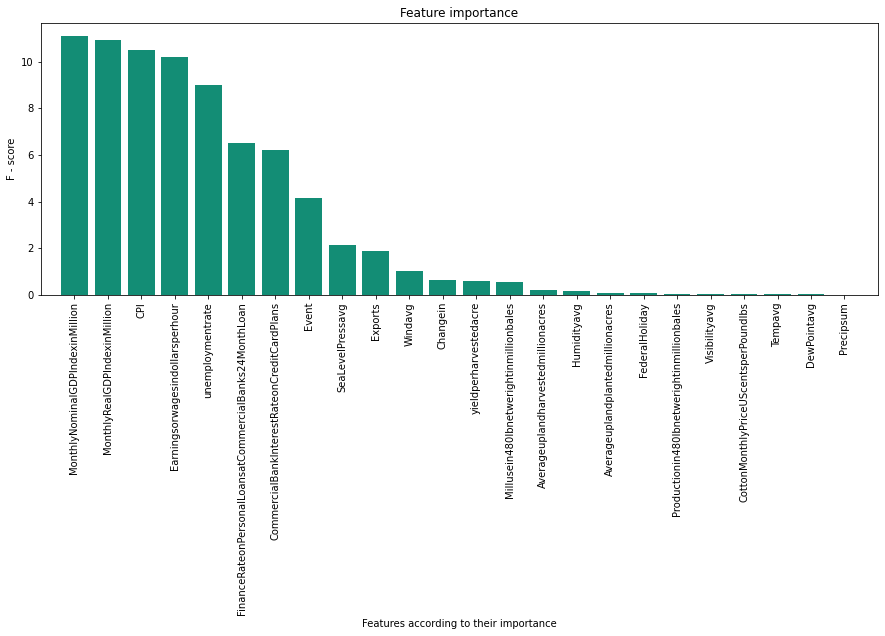

In [351]:
#plotting bar plot of feature importance
plt.figure(figsize =(15,5))
plt.title("Feature importance")
plt.bar(range(Indpendent_features.shape[1]), importances[indices],
       color="#138D75", align="center")
plt.xticks(range(Indpendent_features.shape[1]), Important_features, rotation = 90)
plt.xlim([-1, Indpendent_features.shape[1]])
plt.ylabel('F - score')
plt.xlabel('Features according to their importance')
plt.show()

Dropping Columns which are not important for predictions

In [352]:
All_Sales_df= All_Merged.drop(['Averageuplandharvestedmillionacres','Productionin480lbnetwerightinmillionbales',
                                                 'Tempavg','DewPointavg','Humidityavg', ], axis = 1)

In [353]:
All_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ProductCategory                                         252 non-null    object 
 1   SalesInThousandDollars                                  252 non-null    float64
 2   MonthlyNominalGDPIndexinMillion                         252 non-null    float64
 3   MonthlyRealGDPIndexinMillion                            252 non-null    float64
 4   CPI                                                     252 non-null    float64
 5   unemploymentrate                                        252 non-null    float64
 6   CommercialBankInterestRateonCreditCardPlans             252 non-null    float64
 7   FinanceRateonPersonalLoansatCommercialBanks24MonthLoan  252 non-null    float64
 8   Earningsorwagesindollarsperhour         

Product category need to converted into Numeric

In [354]:
## converting text data into numerical
All_Sales_df.replace({'MenClothing': 0, 'WomenClothing': 1,'OtherClothing':2},inplace=True)

In [355]:
# label_encoder
#label_encoder = preprocessing.LabelEncoder()

In [356]:
#All_Sales_df['ProductCategory']= label_encoder.fit_transform(All_Sales_df['ProductCategory'])

In [357]:
All_Sales_df

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Averageuplandplantedmillionacres,yieldperharvestedacre,Millusein480lbnetwerightinmillionbales,Exports,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
0,0,524.0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,...,9.296,799,4.170,11.550,1015.967742,14.000000,12.000000,2.443226,0,2
1,0,496.0,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,...,9.296,799,3.870,11.100,1017.071429,15.178571,12.214286,0.781071,1,1
2,0,542.0,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,...,9.296,799,3.720,11.650,1021.064516,14.258065,11.387097,1.434194,0,0
3,0,669.0,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,...,9.296,787,3.620,12.225,1014.533333,14.066667,11.366667,3.971667,1,0
4,0,650.0,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,...,9.297,803,3.520,12.300,1017.241379,12.275862,8.000000,4.528276,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2,1405.0,18201.392888,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,...,8.750,784,3.675,9.475,1015.225806,15.354839,5.903226,1.925484,0,0
248,2,1261.0,18317.816120,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,...,8.398,777,3.675,9.700,1018.300000,14.766667,7.033333,2.777333,0,1
249,2,1283.0,18278.304270,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,...,8.398,772,3.675,9.700,1018.935484,15.161290,8.451613,3.203871,1,1
250,2,1478.0,18266.244605,16524.199494,261.009,5.0,12.22,9.66,25.38,69.22,...,8.398,770,3.675,9.700,1021.814815,14.814815,7.777778,1.871481,0,2


Shuffling the dataframe rows as our product category column has values in sequential format so which will not give us desired ouput and may lead to poor performance on model

In [358]:
# shuffle the DataFrame rows
All_Sales_df = All_Sales_df.sample(frac = 1)

In [359]:
All_Sales_df

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Averageuplandplantedmillionacres,yieldperharvestedacre,Millusein480lbnetwerightinmillionbales,Exports,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
139,1,3539.00000,16776.992565,15673.439971,257.659,7.3,11.88,10.13,23.80,92.71,...,10.015,796,3.480,13.380,1016.483871,13.935484,6.096774,2.336129,0,0
101,1,2756.00000,14945.570371,14772.318051,240.817,9.4,13.84,11.00,22.34,91.68,...,10.315,806,3.275,13.050,1012.033333,14.233333,8.000000,1.863333,1,0
177,2,914.00000,14596.605447,14595.393094,238.380,10.0,13.71,10.89,22.27,66.82,...,8.989,799,3.370,10.000,1016.774194,14.064516,9.677419,4.572581,1,1
227,2,1566.00000,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,87.49,...,10.136,788,3.580,9.650,1019.225806,12.935484,9.419355,3.974839,2,1
46,0,731.00000,16272.706227,15362.097855,254.285,7.7,11.88,10.64,23.58,80.87,...,12.121,790,3.375,10.875,1021.033333,14.700000,9.300000,1.532333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1,4170.00000,16461.873233,15450.318635,256.270,7.5,11.95,10.34,23.80,92.62,...,12.076,869,3.380,12.450,1018.129032,12.870968,7.870968,6.555161,1,1
128,1,1746.60251,16283.278725,15391.877310,254.554,7.8,11.95,10.37,23.67,84.15,...,12.121,774,3.375,11.075,1016.620690,14.896552,6.448276,3.846207,0,1
211,2,1124.00000,16161.118172,15317.424193,253.472,8.1,11.95,10.37,23.26,84.40,...,12.400,771,3.375,11.375,1015.419355,14.387097,5.419355,2.384839,0,0
173,2,932.00000,14348.530666,14346.820106,237.172,9.5,13.32,11.25,21.96,61.39,...,8.668,796,3.470,10.300,1011.607143,11.571429,7.357143,9.108571,1,0


In [360]:
All_Sales_df.reset_index(drop=True, inplace=True)

In [361]:
All_Sales_df

,ProductCategory,SalesInThousandDollars,MonthlyNominalGDPIndexinMillion,MonthlyRealGDPIndexinMillion,CPI,unemploymentrate,CommercialBankInterestRateonCreditCardPlans,FinanceRateonPersonalLoansatCommercialBanks24MonthLoan,Earningsorwagesindollarsperhour,CottonMonthlyPriceUScentsperPoundlbs,...,Averageuplandplantedmillionacres,yieldperharvestedacre,Millusein480lbnetwerightinmillionbales,Exports,SeaLevelPressavg,Visibilityavg,Windavg,Precipsum,Event,FederalHoliday
0,1,3539.00000,16776.992565,15673.439971,257.659,7.3,11.88,10.13,23.80,92.71,...,10.015,796,3.480,13.380,1016.483871,13.935484,6.096774,2.336129,0,0
1,1,2756.00000,14945.570371,14772.318051,240.817,9.4,13.84,11.00,22.34,91.68,...,10.315,806,3.275,13.050,1012.033333,14.233333,8.000000,1.863333,1,0
2,2,914.00000,14596.605447,14595.393094,238.380,10.0,13.71,10.89,22.27,66.82,...,8.989,799,3.370,10.000,1016.774194,14.064516,9.677419,4.572581,1,1
3,2,1566.00000,17061.071077,15810.410182,257.284,6.7,11.85,10.22,24.30,87.49,...,10.136,788,3.580,9.650,1019.225806,12.935484,9.419355,3.974839,2,1
4,0,731.00000,16272.706227,15362.097855,254.285,7.7,11.88,10.64,23.58,80.87,...,12.121,790,3.375,10.875,1021.033333,14.700000,9.300000,1.532333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1,4170.00000,16461.873233,15450.318635,256.270,7.5,11.95,10.34,23.80,92.62,...,12.076,869,3.380,12.450,1018.129032,12.870968,7.870968,6.555161,1,1
248,1,1746.60251,16283.278725,15391.877310,254.554,7.8,11.95,10.37,23.67,84.15,...,12.121,774,3.375,11.075,1016.620690,14.896552,6.448276,3.846207,0,1
249,2,1124.00000,16161.118172,15317.424193,253.472,8.1,11.95,10.37,23.26,84.40,...,12.400,771,3.375,11.375,1015.419355,14.387097,5.419355,2.384839,0,0
250,2,932.00000,14348.530666,14346.820106,237.172,9.5,13.32,11.25,21.96,61.39,...,8.668,796,3.470,10.300,1011.607143,11.571429,7.357143,9.108571,1,0


In [362]:
Final_Data=All_Sales_df

### Save final processed Data

In [363]:
# process Data file
Process_Data_file=os.path.join(ROOT_PATH,config['processed_data_dir'],config['processed_data_file'])
print(Process_Data_file)

### saving the cleaned data
Final_Data.to_csv(Process_Data_file,index=False)

c:\Nishikant\OneDrive - CriticalRiver Technologies Pvt. Ltd\Development\1-Team Projects\AIML_Projects\Retail Sales Forecasting\data\processed\processed_data.csv
